In [1]:
#get the data
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [2]:
print(len(messages))
print(messages[0:5])

5574
['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'ham\tOk lar... Joking wif u oni...', "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'ham\tU dun say so early hor... U c already then say...', "ham\tNah I don't think he goes to usf, he lives around here though"]


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#tsv file (tab-separated)
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t', names = ["label", "message"])

In [5]:
messages.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
#feature extraction
#length of messages can be a important feature as well 
#make a separate column for length
messages['length'] = messages['message'].apply(len)

In [8]:
messages.describe()
#MAX 910 WORDS, MIN 2 WORDS

,length
count,5572.000000
mean,80.616296
std,60.015593
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [9]:
messages.head(2)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


In [10]:
%matplotlib inline

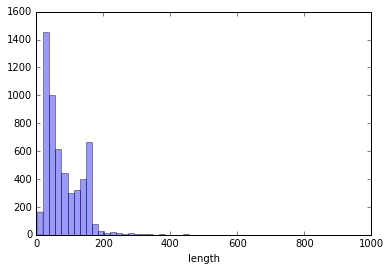

In [11]:
sns.distplot(messages['length'], bins=50, kde=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb91dcffdd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb91e3b0790>], dtype=object)

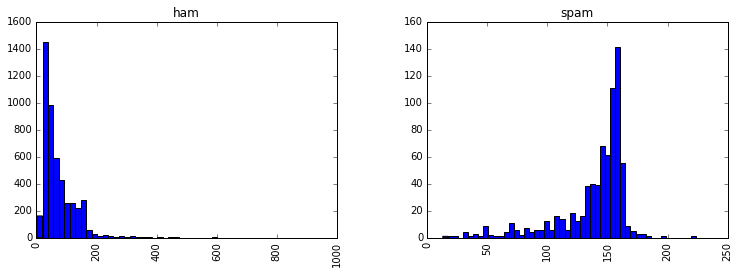

In [12]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [13]:
#Text Pre-Processing using bag of words technique
import string
import nltk

In [ ]:
nltk.download_shell()

In [14]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u"you're"]

In [15]:
def pre_process_text(pmessage):
    """
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    words = [char for char in pmessage if char not in string.punctuation]
    
    words = ''.join(words)
    
    return [word for word in words.split() if word.lower() not in stopwords.words('english')]

In [16]:
messages['message'].head(5).apply(pre_process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Yay! Text preprocessing done

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
transformer = CountVectorizer(analyzer=pre_process_text).fit(messages['message'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  # This is added back by InteractiveShellApp.init_path()


In [19]:
print(len(transformer.vocabulary_))

11425


In [20]:
messages_trans = transformer.transform(messages['message'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  # This is added back by InteractiveShellApp.init_path()


In [21]:
#sparse matrix
print(messages_trans.shape)

(5572, 11425)


In [22]:
#non zero entries
print(messages_trans.nnz)

50548


In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [25]:
tf_transformer = TfidfTransformer().fit(messages_trans)

In [26]:
messages_tf = tf_transformer.transform(messages_trans)

In [27]:
print(messages_tf.shape)

(5572, 11425)


In [28]:
#train a model using naive bayes classifeir
from sklearn.naive_bayes import MultinomialNB

In [29]:
model = MultinomialNB().fit(messages_tf,messages['label'])
# spam detection model trained

In [34]:
#test message to predict the correct label
test_msg = messages['message'][4]

In [35]:
print(test_msg)

Nah I don't think he goes to usf, he lives around here though


In [38]:
print(messages_tf[4])

  (0, 10799)	0.401901546254
  (0, 10450)	0.354070044444
  (0, 10433)	0.270435802512
  (0, 7842)	0.445743727362
  (0, 6877)	0.354070044444
  (0, 6123)	0.240902262921
  (0, 4777)	0.310422627151
  (0, 2948)	0.401901546254


In [41]:
print('predicted:', model.predict(messages_tf[2])[0])
print('expected:', messages.label[2])

('predicted:', 'spam')
('expected:', 'spam')


In [43]:
print('predicted:', model.predict(messages_tf[6])[0])
print('expected:', messages.label[6])

('predicted:', 'ham')
('expected:', 'ham')


In [ ]:
#Model Evaluation